<a href="https://colab.research.google.com/github/Harsaroop/COMP-3710-Project-2/blob/main/MultiplelinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression

In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [3]:
#Load Dataset 
df = pd.read_csv('/content/Bias_correction_ucl - Copy.csv', nrows=5000)
data = df.round(decimals=3)

In [4]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,2013-06-30,28.7,21.4,58.256,91.116,28.074,23.007,6.819,69.452,...,0.0,0.0,0.0,37.605,126.991,212.335,2.785,5992.896,29.1,21.2
1,2,2013-06-30,31.9,21.6,52.263,90.605,29.851,24.035,5.692,51.937,...,0.0,0.0,0.0,37.605,127.032,44.762,0.514,5869.312,30.5,22.5
2,3,2013-06-30,31.6,23.3,48.690,83.974,30.091,24.566,6.138,20.573,...,0.0,0.0,0.0,37.578,127.058,33.307,0.266,5863.556,31.1,23.9
3,4,2013-06-30,32.0,23.4,58.240,96.484,29.705,23.326,5.650,65.727,...,0.0,0.0,0.0,37.645,127.022,45.716,2.535,5856.965,31.7,24.3
4,5,2013-06-30,31.4,21.9,56.174,90.155,29.114,23.486,5.735,107.966,...,0.0,0.0,0.0,37.551,127.135,35.038,0.505,5859.552,31.2,22.5


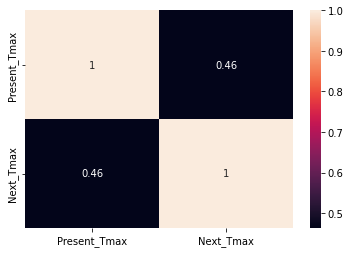

In [5]:
#Correlation Heatmap
viz = sns.heatmap(data[['Present_Tmax', 'Next_Tmax']].corr(), annot = True)

The correlation signs varies between -1.0 and 1.0 . Signs indicates its positive correlation or negative correlation.

In [13]:
import statsmodels.api as sm
x = sm.add_constant(data['Present_Tmax'])
y = data['Next_Tmax']
print(x.shape)
print(y.shape)
x

(5000, 2)
(5000,)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Present_Tmax
0,1.0,28.7
1,1.0,31.9
2,1.0,31.6
3,1.0,32.0
4,1.0,31.4
...,...,...
4995,1.0,29.4
4996,1.0,30.5
4997,1.0,29.9
4998,1.0,29.8


In [15]:
print(y)

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
4995    31.4
4996    32.3
4997    33.6
4998    32.6
4999    32.5
Name: Next_Tmax, Length: 5000, dtype: float64


In [17]:
#Spilt data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 2)
(1500, 2)
(3500,)
(1500,)


In [47]:
#Fitting the model
import statsmodels.api as sm
ml = sm.OLS(y_train,x_train).fit()
#  or 
# ml = LinearRegression(fit_intercept=True)
# model = ml.fit(x_train, y_train)

In [46]:
ml.coef_

array([0.        , 0.40982803])

In [35]:
ml.intercept_

17.92578167442568

In [48]:
#Print parameters
print(ml.params)

const           17.925782
Present_Tmax     0.409828
dtype: float64


In [49]:
ml.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.202     
Dependent Variable: Next_Tmax        AIC:                17298.5258
Date:               2022-04-23 14:16 BIC:                17310.8469
No. Observations:   3500             Log-Likelihood:     -8647.3   
Df Model:           1                F-statistic:        885.6     
Df Residuals:       3498             Prob (F-statistic): 1.13e-173 
R-squared:          0.202            Scale:              8.1988    
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const           17.9258    0.4063  44.1170  0.0000  17.1291  18.7224
Present_Tmax     0.4098    0.0138  29.7593  0.0000   0.3828   0.4368
-------------------------------------------------------------------
Omnibus:             2015.786      Durbin-Watson:         2.029    
Prob(Omnibus):       0.000         Jarque-Bera (JB):      77920.900
Skew:                -2.110        Prob(JB):              0.000    
Kurtosis:            25.727        Condition No.:         248      
===================================================================

"""

In [52]:
#Predict values of test dataset
y_pred_test = ml.predict(x_test)
y_pred_train = ml.predict(x_train)

In [59]:
from sklearn.metrics import r2_score
np.abs(r2_score(y_train,y_pred_train))

0.20202866450564416

In [60]:
r2_score(y_test,y_pred_test)

0.24718334448873525

In [62]:
#Calculate Root mean square error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred_test))

2.6349475069042474

Text(0, 0.5, 'Predicted')

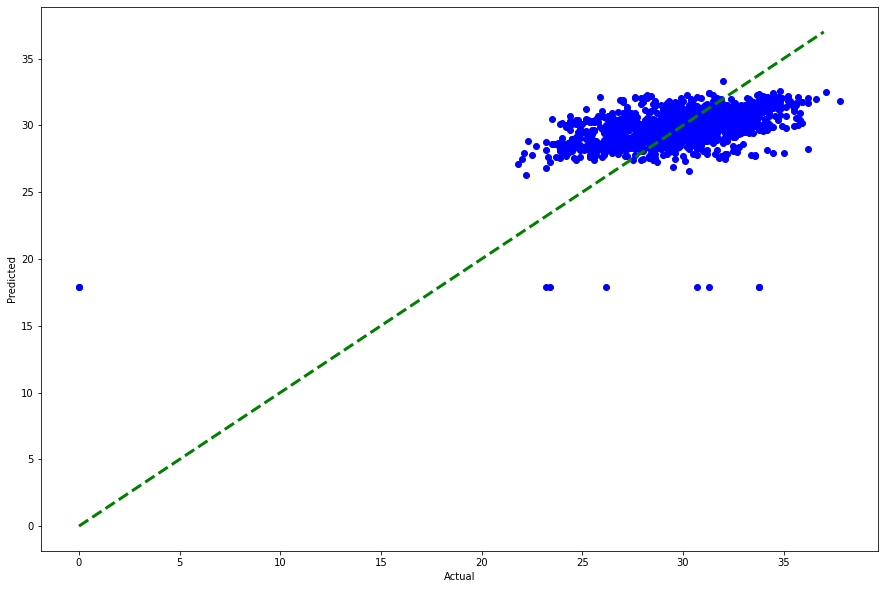

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = 'b')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()],'k--', color='g', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [71]:
pred_val = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred_test, 'Difference':y_test-y_pred_test})
pred_val[0:20]

,Actual Value,Predicted Value,Difference
789,32.3,29.687846,2.612154
2507,30.6,28.540328,2.059672
2376,29.9,32.023866,-2.123866
1378,32.9,30.999296,1.900704
598,28.4,28.950156,-0.550156
1589,31.0,30.794382,0.205618
2580,28.4,29.400966,-1.000966
366,29.2,28.253448,0.946552
2320,33.3,30.999296,2.300704
1247,34.3,30.958313,3.341687
